# Shelter Usage Data Analysis

This assignment aims to conduct an exploratory data analysis and quantitative analysis of the shelter usage trends by examining the daily occupancy and capacity of Toronto shelters for the year 2021. Investigating the occupancy rates and serving user counts for different types of capacity, and give a potential strategy in future established shelters so that more homeless could be accepted when they need overnight and shelter services.

In [3]:
# Run this chunk to upload the input data file
from google.colab import files
files_upload = files.upload()

Saving INF2178_A1_data.xlsx to INF2178_A1_data.xlsx


In [31]:
# import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [32]:
# read data into dataframe and take a glimpse of the data
ShelterDf = pd.read_excel('INF2178_A1_data.xlsx')
ShelterDf.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


## Data Pre-Processing and Cleaning

In [33]:
# list of columns that will be used in later analysis
cols_to_use = ['PROGRAM_ID', 'PROGRAM_MODEL', 'CAPACITY_TYPE',
               'SERVICE_USER_COUNT', 'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS',
               'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS']
# slicing needed columns and assigned to new data frame
ShelterDF1 = ShelterDf[cols_to_use]

In [34]:
# Adding new variable OCCUPANCY_RATE:
## For rows CAPACITY_TYPE is Room Based Capacity, OCCUPANCY_RATE is equal to
## OCCUPIED_ROOMS / CAPACITY_ACTUAL_ROOM.
## For rows CAPACITY_TYPE is Bed Based Capacity, OCCUPANCY_RATE is equal to
## OCCUPIED_BEDS / CAPACITY_ACTUAL_BED
ShelterDF1['OCCUPANCY_RATE'] = np.where(
    ShelterDF1['CAPACITY_TYPE'] == 'Room Based Capacity',
    ShelterDF1['OCCUPIED_ROOMS']/ShelterDF1['CAPACITY_ACTUAL_ROOM'], None)
ShelterDF1['OCCUPANCY_RATE'] = np.where(
    ShelterDF1['CAPACITY_TYPE'] == 'Bed Based Capacity',
    ShelterDF1['OCCUPIED_BEDS']/ShelterDF1['CAPACITY_ACTUAL_BED'],
    ShelterDF1['OCCUPANCY_RATE'])

# Change OCCUPANCY_RATE type to float
ShelterDF1['OCCUPANCY_RATE'] = ShelterDF1['OCCUPANCY_RATE'].astype(float)

<ipython-input-34-dd87d4699927>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ShelterDF1['OCCUPANCY_RATE'] = np.where(
<ipython-input-34-dd87d4699927>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ShelterDF1['OCCUPANCY_RATE'] = np.where(
<ipython-input-34-dd87d4699927>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [35]:
# take a glimpse of the dataframe after adding new variable
ShelterDF1.head()

,PROGRAM_ID,PROGRAM_MODEL,CAPACITY_TYPE,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE
0,15371,Emergency,Room Based Capacity,74,NaN,NaN,29.0,26.0,0.896552
1,16211,Emergency,Room Based Capacity,3,NaN,NaN,3.0,3.0,1.000000
2,16192,Emergency,Room Based Capacity,24,NaN,NaN,28.0,23.0,0.821429
3,16191,Emergency,Room Based Capacity,25,NaN,NaN,17.0,17.0,1.000000
4,16193,Emergency,Room Based Capacity,13,NaN,NaN,14.0,13.0,0.928571


In [36]:
# Create two separate sub-dataframe for room based capacity type and
## bed based capacity type for later use.
RoomBasedDF = ShelterDF1[ShelterDF1['CAPACITY_TYPE'] == 'Room Based Capacity']
BedBasedDF = ShelterDF1[ShelterDF1['CAPACITY_TYPE'] == 'Bed Based Capacity']

## Exploratory Data Analysis (EDA)

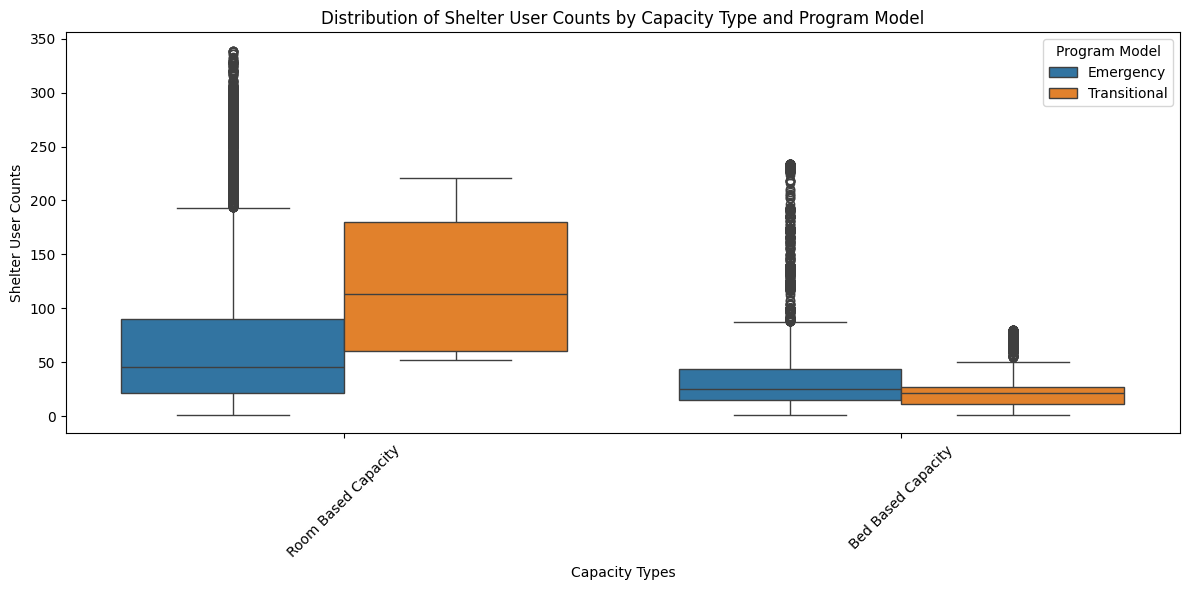

In [37]:
# Creating a combined box plot which has capacity type to be x, catagorized by
## program model, and the shelter user counts as y.
plt.figure(figsize=(12, 6)) # set size
# state x, y, and hue
sns.boxplot(x='CAPACITY_TYPE', y='SERVICE_USER_COUNT',
            hue = 'PROGRAM_MODEL', data=ShelterDF1)
# set title and lables
plt.title('Distribution of Shelter User Counts by Capacity Type and Program Model')
plt.ylabel('Shelter User Counts')
plt.xlabel('Capacity Types')
plt.xticks(rotation=45)
plt.tight_layout()
# show the legend
plt.legend(title='Program Model')

The above combined boxplot shows the distribution of shelter user counts by different capacity type and program model. By examining the resulting boxplots as a whole, it is obvious that the shelter user count of room based capacity is higher than bed based capacity.

For room based capacity, the spread of the middle 50% of the data is about between 25 and 90 for the emergency model and is about between 60 and 190 for the transitional model. The latter has a bigger range and higher shelter user counts compared to prior. The median for transitional is about 120 and is about 40 for emergency, which is also a big difference.

For bed based capacity, the spread of the middle 50% of the data is about between 2 and 50 for the emergency model and is about between 15 and 25 for the transitional model. The prior has a bigger range. The median for transitional is about 20 and is about 25 for emergency, which is almost the same.

All the boxplot has a right skewness(positively skewed). For both the room based and bed based capacity, large numbers of outliers were found for the emergency program model. In the future analysis, the outliers could be more properly handled before conducting the EDA.


In [38]:
# This chunk of code refers to the INF2178 lecture code
# define a function to get the report of statistics
def get_summary_statistics(dataset):

    # compute statistics
    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    sd = np.round(np.std(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2)
    quartile_3 = np.round(dataset.quantile(0.75), 2)

    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)

    # print all the results
    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)
    print('Standard deviation: %s' % sd)

In [39]:
# get Room Based Capacity Service User Count summary statistics
print('\nRoom Based Capacity Service User Count summary statistics')
get_summary_statistics(RoomBasedDF['SERVICE_USER_COUNT'])


Room Based Capacity Service User Count summary statistics
Min: 1
Mean: 73.59
Max: 339
25th percentile: 22.0
Median: 47.0
75th percentile: 96.0
Interquartile range (IQR): 74.0
Standard deviation: 73.32


In [40]:
# get Bed Based Capacity Service User Count summary statistics
print('\nBed Based Capacity Service User Count summary statistics')
get_summary_statistics(BedBasedDF['SERVICE_USER_COUNT'])


Bed Based Capacity Service User Count summary statistics
Min: 1
Mean: 29.78
Max: 234
25th percentile: 14.0
Median: 23.0
75th percentile: 41.0
Interquartile range (IQR): 27.0
Standard deviation: 26.38


By examining above summary statistics of service user counts for both room based and bed based capacity, room based capacity is much higher for its mean, max, and median compared to bed based capacity. This shows that room based capacity tends to accept more homeless than bed based capacity in each service. Comparing two standard deviations, room based has more variability. For both summary, the mean is bigger than the median, which means that both data are positively skewed (right skewness). This means that mean is more influenced by extreme values, and median is more suitable to be a measure of central tendency.

In [41]:
# get Bed Based Capacity Occupancy Rate summary statistics
print('\nBed Based Capacity Occupancy Rate summary statistics')
get_summary_statistics(BedBasedDF['OCCUPANCY_RATE'])


Bed Based Capacity Occupancy Rate summary statistics
Min: 0.02
Mean: 0.93
Max: 1.0
25th percentile: 0.9
Median: 1.0
75th percentile: 1.0
Interquartile range (IQR): 0.1
Standard deviation: 0.12


In [42]:
# get Room Based Capacity Occupancy Rate summary statistics
print('\nRoom Based Capacity Occupancy Rate summary statistics')
get_summary_statistics(RoomBasedDF['OCCUPANCY_RATE'])


Room Based Capacity Occupancy Rate summary statistics
Min: 0.01
Mean: 0.93
Max: 1.01
25th percentile: 0.96
Median: 1.0
75th percentile: 1.0
Interquartile range (IQR): 0.04
Standard deviation: 0.16


By examining above summary statistics of occupancy rate for both room based and bed based capacity, both capacity is very identical for its mean, max, and median. This sugests that both capacities have similar occupancy rate. Comparing two standard deviations, room based has slightly more variability. For both summary, the mean is slightly bigger than the median, which means that both data are slightly positively skewed (right skewness).


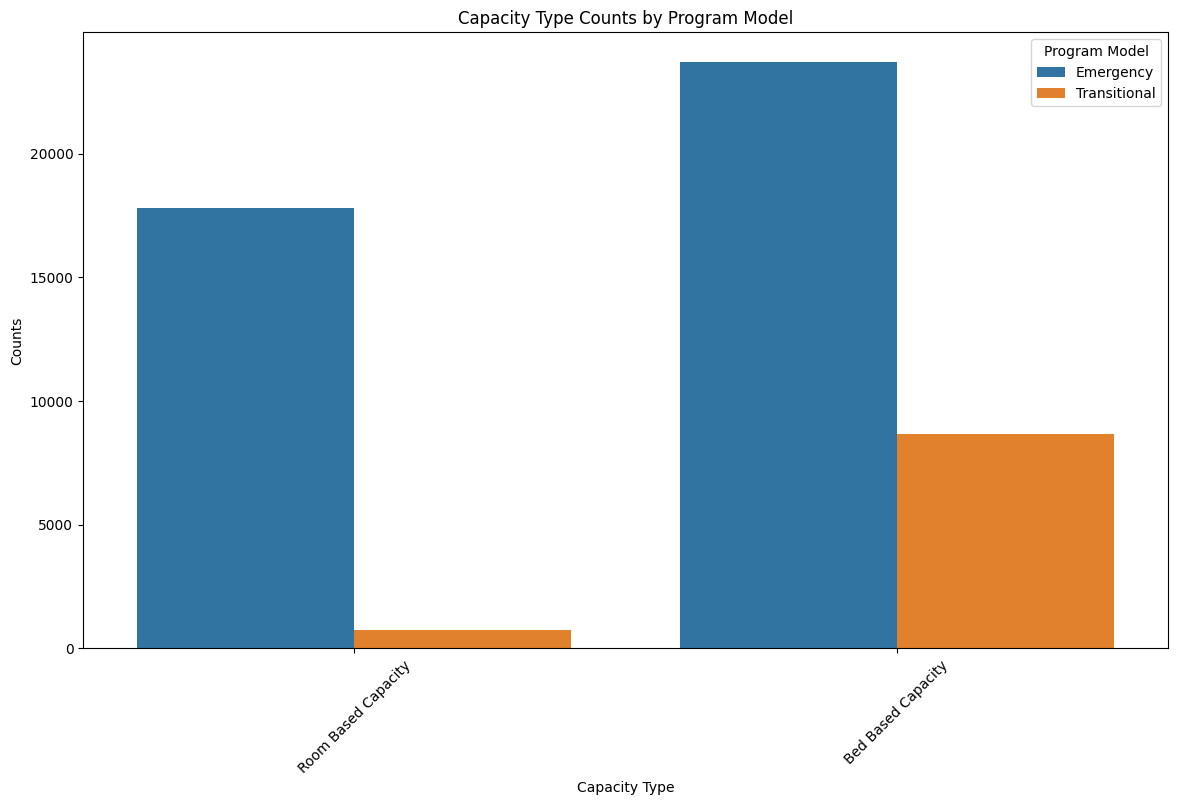

In [43]:
# create a combined bar plots for capacity type, categorized by program model.
plt.figure(figsize=(14, 8))
sns.countplot(x='CAPACITY_TYPE', hue='PROGRAM_MODEL', data=ShelterDF1)
# Set plot labels and title
plt.title('Capacity Type Counts by Program Model')
plt.xlabel('Capacity Type')
plt.ylabel('Counts')
plt.xticks(rotation=45)
# show the legend
plt.legend(title='Program Model')

The above combined bar plots show the counts of capacity, categorized by its type and the program model. As a whole, it is obvious that the bed based capacity type is much more than room based capacity type in count. However, referring back to the previous box plot, room based capacity has more service users than the bed based capacity, and this shows that although room based capacity service is less than bed based, it could accept more homeless than bed based capacity. For both capacity types, emergency model has much higher counts than transitional programs. Indicating that both capacities tend to construct emergency program.


Text(0.5, 1.0, 'Distribution of Service User Count for Room Based Capacity')

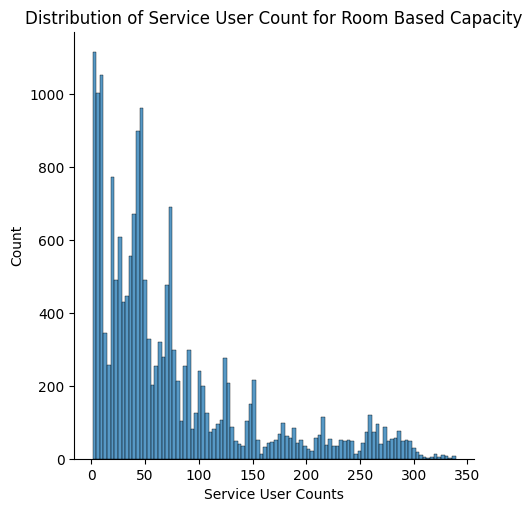

In [44]:
# Create a histogram for room based capacity's service user count
sns.displot(RoomBasedDF['SERVICE_USER_COUNT'], bins=100)
plt.xlabel('Service User Counts')
plt.title('Distribution of Service User Count for Room Based Capacity')

The above histogram shows the distribution of service user count for room based capacity. As shown above, it is positively skewed (right skewness), meaning median could be more appropriate in terms of measuring central tendency since mean could be influenced by outliers. Also, the above histogram could be seen as a unimodal which has the highest peak above 1000 count at service user count around 5. Nevertheless, there is another second high peak at closing to 1000 count at service user count around 48. The histogram has multiple small peaks after the first main one, hence it may also be seen as a multimodal histogram. Most of the data distributed before 100 service user count, which suggests that most of the room based capacity has its occupancy less than 100 count.


Text(0.5, 1.0, 'Distribution of Service User Count for Bed Based Capacity')

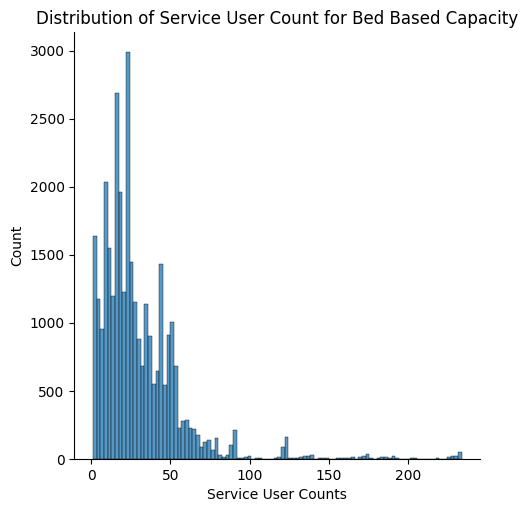

In [45]:
# Create a histogram for bed based capacity's service user count
sns.displot(BedBasedDF['SERVICE_USER_COUNT'], bins=100)
plt.xlabel('Service User Counts')
plt.title('Distribution of Service User Count for Bed Based Capacity')

The above histogram shows the distribution of service user count for bed based capacity. As shown above, it is positively skewed (right skewness), meaning median could be more appropriate in terms of measuring central tendency since mean could be influenced by outliers. Also, the above histogram could be seen as a unimodal which has the highest peak almost reaching 3000 count at service user count around 25. Most of the data distributed before 50 service user count, which suggests that most of the bed based capacity has its occupancy less than 50 count. Compared to the previous histogram, bed based capacity is much bigger in its counts at its highest peak than room based.


Text(0.5, 1.0, 'Distribution of Shelter Occupancy Rate')

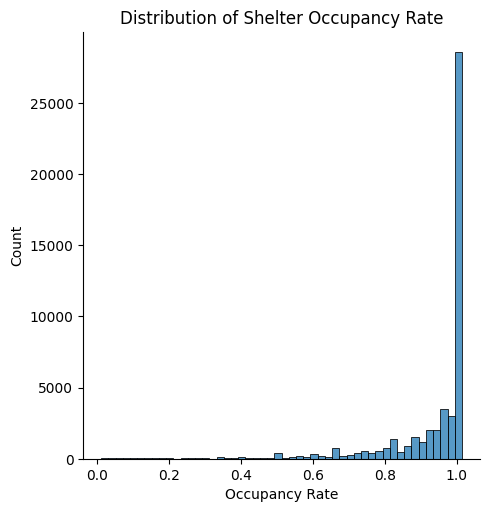

In [46]:
# Create a histogram to show the distribution of the overall occupancy rate
sns.displot(ShelterDF1['OCCUPANCY_RATE'], bins=50)
plt.xlabel('Occupancy Rate')
plt.title('Distribution of Shelter Occupancy Rate')

The above histogram shows the distribution of shelter occupancy rate as a whole. It is very clear that the distribution is extremely left skewed (left skewness), showing most of the data points are distributed after 0.8. It is a unimodal histogram. This suggests that regarding the capacity type, most of the shelters are fully occupied.

#### EDA Summary

As a whole, room based capacity is less in its count compared to bed based capacity. Nevertheless, each room based capacity tends to accept much more homeless when compared to bed based capacity. Regarding the capacity types, there are much more emergency programs than transitional programs, however, room based capacity has a bigger interquartile range and value in transitional programs than in emergency programs. Moreover, the occupancy rate for shelter usage is extremely high; most of the shelters are fully occupied, which means increased homeless could face a problem of not having a place for overnight stay. Shelter organizations may need to consider changing the strategies in the future, building more room based capacities, and increasing the amount of transitional programs.


## Quantitative Analysis: T-Tests

In [47]:
# Conducting a 2 sample t-test, one tailed (x > y), for occupancy rate

# set room based capacity occupancy rate as x
x = RoomBasedDF['OCCUPANCY_RATE']
# set bed based capacity occupancy rate as y
y = BedBasedDF['OCCUPANCY_RATE']

## Using the internal function from SciPy Package
t_stat, p_val = stats.ttest_ind(x, y, alternative='greater')
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = 4.854104599422829
p-value = 6.064466591735712e-07


Null hypothesis: there is no significant difference, or the mean of x (room based occupancy rate) is less than or equal to the mean of y (bed based occupancy rate).

Alternative hypothesis: there is a significant difference and the mean of x (room based occupancy rate) is greater than the mean of y (bed based occupancy rate).

p-value is much more less than 0.05 (assumed significance level), hence we have strong evidence to reject null hypothesis. This suggests that the mean of room based occupancy rate is significantly higher than bed based.

In [53]:
# Conducting a 2 sample t-test, one tailed (x > y), for service user count

# set room based capacity service user count as x
x1 = RoomBasedDF['SERVICE_USER_COUNT']
# set bed based capacity service user count as y
y1 = BedBasedDF['SERVICE_USER_COUNT']

## Using the internal function from SciPy Package
t_stat, p_val = stats.ttest_ind(x1, y1, alternative='greater')
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = 97.1228806296218
p-value = 0.0


Null hypothesis: there is no significant difference, or the mean of x (room based service user count) is less than or equal to the mean of y (bed based service user count).

Alternative hypothesis: there is a significant difference and the mean of x (room based service user count) is greater than the mean of y (bed based service user count).

p-value is much more less than 0.05 (assumed significance level), hence we have strong evidence to reject null hypothesis. This suggests that the mean of room based service user count is significantly higher than bed based.

### End of the analysis. Thanks for reading!